In [130]:
# Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tabula as tb
import scipy
plt.rcParams['figure.figsize']=(10,5)

In [131]:
# Считываем все таблицы из задания с помощью библиотеки tabula
pdf_red_array = tb.read_pdf("tasks/Практика 28 сентября 2021.pdf", pages="all") 

Got stderr: Dec 03, 2021 4:07:18 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:18 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:19 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:19 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:19 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:20 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:20 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 03, 2021 4:07:20 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [132]:
# Проверяем количество получившихся таблиц
# (их вышло больше, посколку некоторые таблицы были разделены по страницам)
len(pdf_red_array)

12

In [133]:
# В результате считывания получаем список из датафреймов, каждый помещаем в переменную
task_0_df = pdf_red_array[0]
task_1_df = pdf_red_array[1]
task_2_df = pdf_red_array[2]
task_3_df = pdf_red_array[3]
task_4_df = pdf_red_array[4]
task_5_df = pdf_red_array[5]
task_6_df = pdf_red_array[6]
task_7_df = pdf_red_array[7]
task_8_df = pdf_red_array[8]
task_9_df = pdf_red_array[9]
task_10_df = pdf_red_array[10]
task_11_df = pdf_red_array[11]

# ЗАДАНИЕ_1
Известно, что при существенных различиях в уровне подготовки студентов,
обучающая методика будет неэффективна. Условие соблюдения
однородности подготовки при разбросе в набранных на входном тестировании
баллах не должно превышать 4500 (дисперсия). Студенты при тестировании
показали следующие результаты: 240, 256, 334, 176, 254, 219, 277, 414, 215,
366 баллов. Докажите, что условие однородности не соблюдается. Будет ли
группа однородна по уровню подготовки, если перевести в другую группу
самого успевающего студента?

In [134]:
students_results = np.array([240, 256, 334, 176, 254, 219, 277, 414, 215, 366])

In [135]:
# В случае если студент остается в группе дисперсия превышает заданный порог
students_results.var() 

4965.09

In [136]:
# Если сильный студент переходит в другую группу, то дисперсия не превышает заданный порог
np.delete(students_results ,np.where(students_results == students_results.max())).var()

3134.8888888888887

# ЗАДАНИЕ_2
На основании данных тестирования по 10 дисциплинам рассчитать
коэффициент разности степени подготовки студентов – децильный
коэффициент (отношение девятого дециля к первому):

In [137]:
task_0_df

,Баллы,<100,101-300,301-500,501-700,701-900,901-1000
0,кол-во,160.0,174.0,40.0,20.0,4.0,2.0
1,чел,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Убираем лишнюю строчку
task_0_df = task_0_df.drop(1, axis=0)

In [139]:
# Перевернем таблицу для удобного счета и сразу отсортируем 
task_0_df = task_0_df.melt(id_vars="Баллы").rename({"value": "scores"}, axis=1)
task_0_df = task_0_df.sort_values(by="scores")

In [140]:
# Дабавим отдельную колонку с децильным значениями
task_0_df["decil_rank"] = pd.qcut(task_0_df["scores"], q=10, labels=False)

In [141]:
task_0_df["rercents"] = task_0_df["scores"]/task_0_df["scores"].sum()*100

In [142]:
all_students = task_0_df["scores"].sum()

In [143]:
# Посчитаем результат
task_0_df.loc[task_0_df["decil_rank"]==9]["scores"].values[0]\
    /task_0_df.loc[task_0_df["decil_rank"]==0]["scores"].values[0]

87.0

# ЗАДАНИЕ_3
Для выяснения вопроса растет ли компетенция учителя с его стажем оцените
силу линейной связи между стажем педагогов и их компетенцией, оцененной
по определённой методике

In [144]:
task_1_df

,Номер,Стаж,Компетенция
0,1,16,26
1,2,22,15
2,3,25,22
3,4,40,30
4,5,22,16
5,6,16,30


No handles with labels found to put in legend.


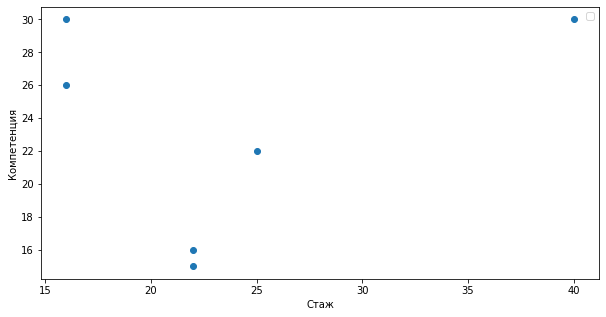

In [145]:
# Визуально оценми предположительную связь
plt.scatter(x=task_1_df["Стаж"], y=task_1_df["Компетенция"])
plt.xlabel("Стаж")
plt.ylabel("Компетенция")
plt.legend()
plt.show()

In [146]:
# Получим связь
np.corrcoef(task_1_df["Стаж"], task_1_df["Компетенция"])[0, 1]

0.2091591742720674

# ЗАДАНИЕ_4
При проверке работы учителей составили таблицу, отражающую связь опыта
работы по новой методике и количества зафиксированных отклонений от
предложенной методики:
Рассчитайте силу линейной связи между имеющимися данными, сделайте
выводы.

In [147]:
# Добавим пропущенную строку
task_2_df = task_2_df.append(\
    pd.DataFrame({"Количество":[2], "Unnamed: 0":[24], "Опыт работы":[12], "Unnamed: 1":[3]}))

In [148]:
# Изменим названия колонок для удобства
task_2_df.columns = task_2_df.iloc[0].values

In [149]:
task_2_df = task_2_df.reset_index().drop(0, axis=0).drop("index", axis=1)

In [150]:
# Преобразуем строки в числа
task_2_df = task_2_df.applymap(int)

In [151]:
task_2_df

,нарушений,< 6 месяцев,6 – 12 месяцев,> 12 месяцев
1,0,8,16,27
2,1,13,19,16
3,2,24,12,3


In [152]:
np.corrcoef(task_2_df["нарушений"],task_2_df["< 6 месяцев"])[0, 1]

0.9773555548504418

In [153]:
np.corrcoef(task_2_df["нарушений"],task_2_df["6 – 12 месяцев"])[0, 1]

-0.5694947974514993

In [154]:
np.corrcoef(task_2_df["нарушений"],task_2_df["> 12 месяцев"])[0, 1]

-0.9988445981121533

In [155]:
# Между количетсвом ошибок и стажем работы имеется сильная связь, причем чем больше стаж, тем меньше 
# ошибок 

# ЗАДАНИЕ_5
Для оценки образовательной активности педагогов ввели коэффициент
активности педагогов по повышению квалификации. Данные по двум
образовательным организациям и активности повышения квалификации
педагогов представлены в таблицах:
Сравните связь между возрастом и коэффициентов активности педагогов по
повышению квалификации в этих образовательных организациях с помощью
показателя ковариации, Коэффициент корреляции, рассчитанный по данным
двух образовательных организаций, составляет 0,31 и указывает на наличие
связи между признаками. можно ли распространить этот вывод на обе
организации?

In [156]:
# Преобразуем таблицу в более удобный формат
first_org = task_4_df.drop(0, axis=0).melt().drop([0,1], axis=0)
second_org = task_5_df.drop(0, axis=0).melt().drop([0,1], axis=0)

In [157]:
first_org

,variable,value
2,1,23.0
3,1,0.0
4,2,36.0
5,2,30.0
6,3,18.0
7,3,100.0
8,4,24.0
9,4,31.0
10,5,56.0
11,5,36.0


In [158]:
"""# Визуально оценим данные для первой организации
plt.scatter(x=first_org.loc[first_org["номер по"]=="возраст"],\
    y=first_org.loc[first_org["номер по"]=="коэф.пов.кв."])"""

'# Визуально оценим данные для первой организации\nplt.scatter(x=first_org.loc[first_org["номер по"]=="возраст"],    y=first_org.loc[first_org["номер по"]=="коэф.пов.кв."])'

# ЗАДАНИЕ_6
Образовательные и языковые компании заинтересованы в увеличении числа
постоянных учеников, приобретающих годовые образовательные курсы.
Существует гипотеза, что большие компании успешнее привлекают таких
учеников, в том числе, и в относительном выражении, т.е. доля ,
приобретающих годовые образовательные курсы будет расти с ростом
образовательной компании. Для проверки этой гипотезы собраны данные по
16 образовательным компаниям четырех городов. Данные агрегированы по
городам. С помощью коэффициента корреляции Пирсона проверьте эту
гипотезу.

In [159]:
task_6_df.loc[-1] = task_6_df.columns

In [160]:
# Добавим нужную колонку к датафрейму и поменям имена колонок
task_6_df.index = task_6_df.index + 1
task_6_df.sort_index
task_6_df.columns = ["city", "students", "courses"]

In [161]:
task_6_df[["students", "courses"]] = task_6_df[["students", "courses"]].applymap(int)

<AxesSubplot:xlabel='students', ylabel='courses'>

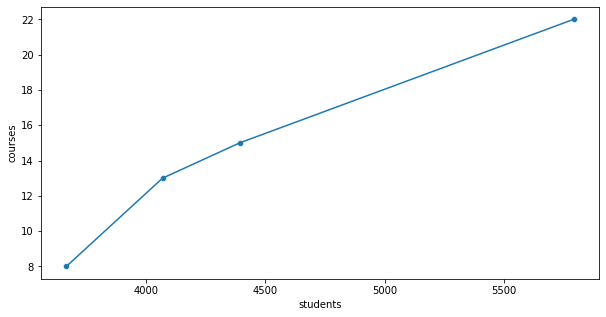

In [162]:
# Построим график для приблизительной оценки связи количества студентов и популярности курсов
sns.scatterplot(data=task_6_df[["students", "courses"]], x="students", y="courses")
sns.lineplot(data=task_6_df[["students", "courses"]], x="students", y="courses")


In [163]:
# Рассчитаем коэффициент корреляции
# Наблюдаем сильную положительную корреляцию, на основе чего может сделать вывод
# о сильной связи между популярностью заведения и продажей курсов
np.corrcoef(task_6_df["students"], task_6_df["courses"])[0][1]

0.976516635153336

In [164]:
# Для второй части задания приведем таблицу в подходящий вид
task_7_df = task_7_df.transpose().drop([1, 3, 4, 6] ,axis=1)

In [165]:
task_df_7 = task_7_df.reset_index()

In [166]:
task_7_df = task_7_df.reset_index()

In [167]:
task_7_df.columns = ["town", "school", "students", "courses"]

In [168]:
task_7_df = task_7_df.drop(0, axis=0)

In [169]:
task_7_df.index = task_7_df.index - 1

In [170]:
task_7_df

,town,school,students,courses
0,Unnamed: 0,1.0,855.0,27.0
1,А,2.0,1290.0,21.0
2,Unnamed: 1,3.0,15231.0,18.0
3,Unnamed: 2,1.0,6587.0,19.0
4,Б,2.0,3409.0,3.0
5,Unnamed: 3,3.0,1005.0,2.0
6,Unnamed: 4,1.0,5679.0,12.0
7,В,2.0,4260.0,19.0
8,Unnamed: 5,3.0,2271.0,8.0
9,Unnamed: 6,1.0,7520.0,7.0


In [171]:
task_7_df["town"][2] = "A"
task_7_df["town"][3, 5] = "Б"
task_7_df["town"][6, 8] = "В"
task_7_df["town"][9, 11] = "Г"

In [172]:
task_7_df

,town,school,students,courses
0,Unnamed: 0,1.0,855.0,27.0
1,А,2.0,1290.0,21.0
2,A,3.0,15231.0,18.0
3,Б,1.0,6587.0,19.0
4,Б,2.0,3409.0,3.0
5,Б,3.0,1005.0,2.0
6,В,1.0,5679.0,12.0
7,В,2.0,4260.0,19.0
8,В,3.0,2271.0,8.0
9,Г,1.0,7520.0,7.0


In [173]:
task_7_df.sort_values(by="students")

,town,school,students,courses
0,Unnamed: 0,1.0,855.0,27.0
5,Б,3.0,1005.0,2.0
1,А,2.0,1290.0,21.0
10,Г,2.0,1416.0,19.0
8,В,3.0,2271.0,8.0
4,Б,2.0,3409.0,3.0
11,Г,3.0,4243.0,19.0
7,В,2.0,4260.0,19.0
6,В,1.0,5679.0,12.0
3,Б,1.0,6587.0,19.0


<AxesSubplot:xlabel='students', ylabel='courses'>

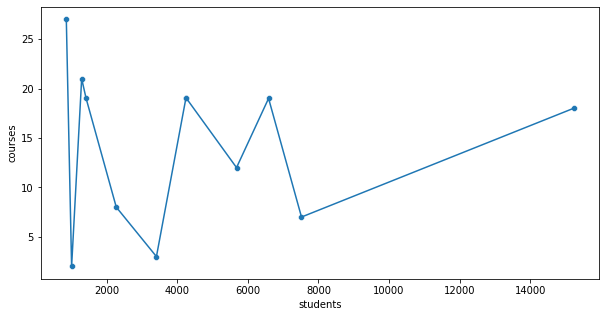

In [174]:
sns.scatterplot(data=task_7_df[["students", "courses"]].sort_values(by="students"),\
    x="students", y="courses")
sns.lineplot(data=task_7_df[["students", "courses"]].sort_values(by="students"),\
    x="students", y="courses")

In [175]:
# Рассчитаем коэффициент корреляции
# Результат поменялся из-за двух сильных выбросов, которые видно на графике
# В учебном заведении с малым кол-вом студентов продалось много курсов
# В то время как в заведении с наибольшим числом студентов продалось среднее количество курсов
np.corrcoef(task_7_df[["students", "courses"]].sort_values(by="students")["students"].astype("float"),\
    task_7_df[["students", "courses"]].sort_values(by="students")["courses"].astype("float"))[0][1]

0.0270277059337159

# ЗАДАНИЕ_7
По окончании обучения в университете часть выпускников получает красные дипломы.
Можно предположить, что вузы, стремясь повысить свой статус, 
выдают приблизительно одинаковый процент красных дипломов, независимо от численности студентов. 
Имеются данные по числу студентов и доле красных дипломовв семи университетах

In [176]:
task_8_df

,Университет,Число студентов в вузе,"Доля красных дипломов, %"
0,А,2712,"2,3"
1,Б,8200,"3,3"
2,В,4563,"2,6"
3,Г,5322,"2,7"
4,Д,1717,"2,1"
5,Ж,6340,"2,9"
6,З,5956,"2,8"


In [177]:
# Переименуем колонки и отсортируем значения по количеству студентов
task_8_df.columns = ["uni", "students", "reds"]

In [178]:
task_8_df

,uni,students,reds
0,А,2712,"2,3"
1,Б,8200,"3,3"
2,В,4563,"2,6"
3,Г,5322,"2,7"
4,Д,1717,"2,1"
5,Ж,6340,"2,9"
6,З,5956,"2,8"


In [179]:
task_8_df = task_8_df.sort_values(by="students")

In [180]:
task_8_df["reds"] = task_8_df["reds"].apply(lambda x: x.replace(",", ".")).apply(float)

<AxesSubplot:xlabel='students', ylabel='reds'>

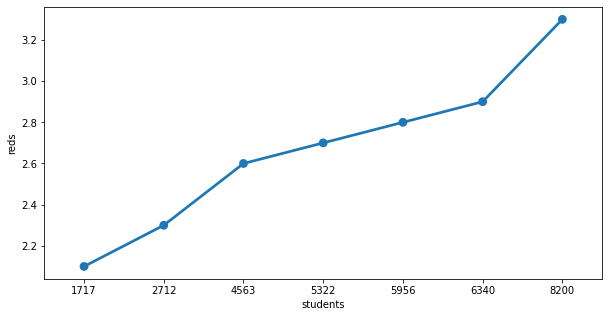

In [181]:
# Сделаем график чтобы оценить связь количества студентов и красных дипломов
sns.lineplot(data=task_8_df, x="students", y="reds")
sns.pointplot(data=task_8_df, x="students", y="reds")

In [182]:
# Рассчитаем коэффициент корреляции
np.corrcoef(task_8_df["students"], task_8_df["reds"])[0][1]

0.9959986182846927

# ЗАДАНИЕ_8
Руководство школы выясняет есть ли связь между стажем работы и количеством жалоб родителей за последний год

In [183]:
task_9_df = task_9_df.transpose().drop([1, 3], axis=1).reset_index().drop("index", axis=1).drop(0, axis=0)

In [184]:
task_9_df.columns = ["exp", "comp"]

In [185]:
task_9_df = task_9_df.applymap(int)

In [186]:
task_9_df

,exp,comp
1,0,1
2,2,0
3,1,1
4,3,1
5,4,2
6,5,0
7,0,2
8,1,0
9,4,0
10,4,0


<AxesSubplot:xlabel='exp', ylabel='comp'>

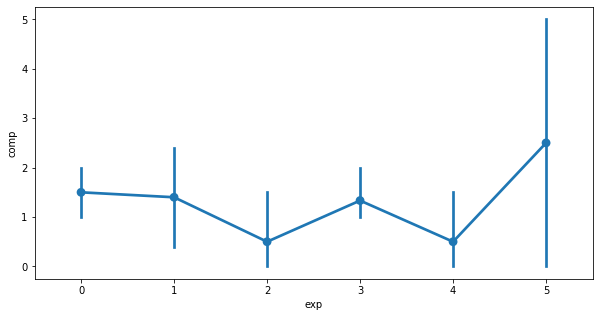

In [188]:
# С учетом 
sns.pointplot(data=task_9_df.sort_values(by="exp"), x="exp", y="comp")
sns.lineplot(data=task_9_df.sort_values(by="exp"), x="exp", y="comp")

<AxesSubplot:xlabel='exp', ylabel='comp'>

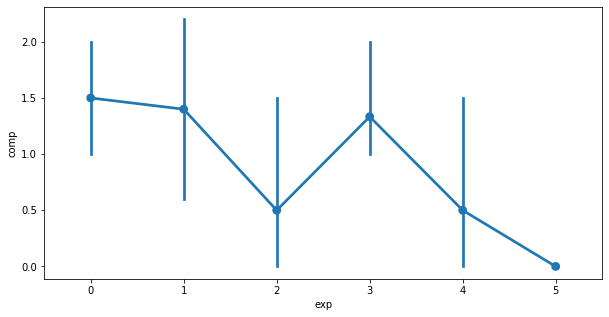

In [189]:
sns.pointplot(data=task_9_df.drop(11, axis=0).sort_values(by="exp"), x="exp", y="comp")
sns.lineplot(data=task_9_df.drop(11, axis=0).sort_values(by="exp"), x="exp", y="comp")

In [190]:
np.corrcoef(task_9_df.sort_values(by="exp")["exp"], task_9_df.sort_values(by="exp")["comp"])[0][1]

0.020497059603453324

In [191]:
np.corrcoef(task_9_df.sort_values(by="exp")["exp"].drop(11, axis=0), \
    task_9_df.sort_values(by="exp")["comp"].drop(11, axis=0))[0][1]

-0.3754551965411892

# ЗАДАНИЕ_9
Образовательная  компания  проводит  отношения  к  новой  обучающей методике.  Предполагается  провести  опрос  среди  лиц, работающих  в образовательных  организациях,  их  возраст  не  должен  коррелировать  со стажем работы в образовании. Оцените, насколько, это условие выполнено

In [192]:
task_10_df

,Номер,Возраст,Стаж работы в ОО
0,1,43,15
1,2,56,6
2,3,50,11
3,4,42,17
4,5,30,7
5,6,45,14
6,7,60,35


In [193]:
task_10_df = task_10_df.drop("Номер", axis=1)

In [196]:
task_10_df = task_10_df.sort_values(by="Возраст").applymap(int)

<AxesSubplot:xlabel='Возраст', ylabel='Стаж работы в ОО'>

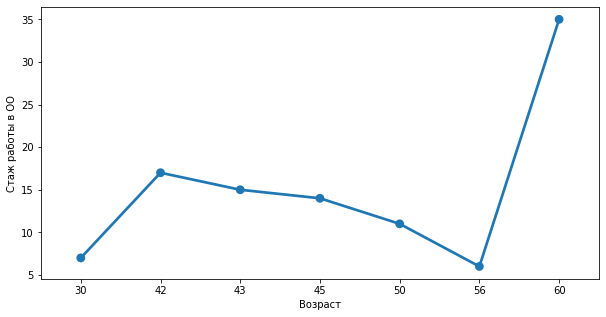

In [198]:
sns.lineplot(data=task_10_df, x="Возраст", y="Стаж работы в ОО")
sns.pointplot(data=task_10_df, x="Возраст", y="Стаж работы в ОО")

# ЗАДАНИЕ_10
В ходе тестирования трех групп студентов выявленаих готовность к новой методике обучения
Оцените разброс значений в группахи определите, какая из трех групп наиболее однородна по готовности к новой методике обучения.

In [199]:
task_11_df

,Оценка готовности,Группа 1,Группа 2,Группа 3
0,1,3,0,6
1,2,5,0,9
2,3,11,2,14
3,4,15,3,15
4,5,14,6,20
5,6,23,19,17
6,7,24,24,19
7,8,4,17,0
8,9,1,15,0
9,10,0,14,0


In [201]:
task_11_df = task_11_df.drop(10, axis=0).applymap(int)

,Оценка готовности,Группа 1,Группа 2,Группа 3
0,1,3,0,6
1,2,5,0,9
2,3,11,2,14
3,4,15,3,15
4,5,14,6,20
5,6,23,19,17
6,7,24,24,19
7,8,4,17,0
8,9,1,15,0
9,10,0,14,0


In [203]:
task_11_df["Группа 1"].std()

28.39302090943541

In [204]:
task_11_df["Группа 2"].std()

28.389498698702596

In [205]:
task_11_df["Группа 3"].std()

28.198646002310756